<a href="https://colab.research.google.com/github/manshikabdal/prediction-using-supervised-ML/blob/main/Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##*Prediction using Supervised ML - Scores based on the hours of studies.*

## Introduction: 
This student dataset includes how much students scored after studying for a certain time. In this case study, I used ML to predict a student's score & checked if study times are related to scores.

##Problem Statement:
Predict the percentage of an student based on the no. of study hours.

##Simple Linear Regression
In this case study, I used simple linear regression because it involves only 2 variables i.e. Hours & Scores.  

##Cleaning the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
student_data = pd.read_csv(url)
student_data2 = student_data.astype({"Hours":"int32", "Scores":"int32"})

In [ ]:
print(student_data2)

    Hours  Scores
0       2      21
1       5      47
2       3      27
3       8      75
4       3      30
5       1      20
6       9      88
7       5      60
8       8      81
9       2      25
10      7      85
11      5      62
12      4      41
13      3      42
14      1      17
15      8      95
16      2      30
17      1      24
18      6      67
19      7      69
20      2      30
21      4      54
22      3      35
23      6      76
24      7      86


In [ ]:
student_data2

,Hours,Scores
0,2,21
1,5,47
2,3,27
3,8,75
4,3,30
5,1,20
6,9,88
7,5,60
8,8,81
9,2,25


In [ ]:
student_data2.head(10)

,Hours,Scores
0,2,21
1,5,47
2,3,27
3,8,75
4,3,30
5,1,20
6,9,88
7,5,60
8,8,81
9,2,25


In [ ]:
np.random.seed(0)

In [ ]:
student_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   25 non-null     int32
 1   Scores  25 non-null     int32
dtypes: int32(2)
memory usage: 328.0 bytes


In [ ]:
student_data2.shape

(25, 2)

In [ ]:
student_data2.describe()

,Hours,Scores
count,25.000000,25.000000
mean,4.480000,51.480000
std,2.518597,25.286887
min,1.000000,17.000000
25%,2.000000,30.000000
50%,4.000000,47.000000
75%,7.000000,75.000000
max,9.000000,95.000000


In [ ]:
missing_values_count = student_data2.isnull().sum()
missing_values_count[0:25]

Hours     0
Scores    0
dtype: int64

##Now we will check the relationship between two variables. So that we can apply the right model to it.

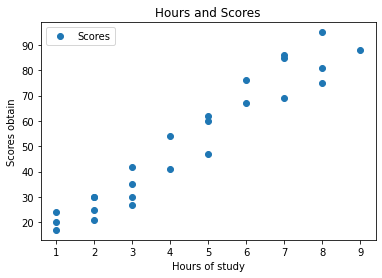

In [ ]:
student_data2.plot(x = 'Hours', y = 'Scores', style='o')
plt.title('Hours and Scores')
plt.xlabel('Hours of study')
plt.ylabel('Scores obtain')
plt.show()

##Training the data set.

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(student_data2, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_vars = ['Scores','Hours']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head(5)

,Hours,Scores
22,0.250,0.230769
17,0.000,0.089744
24,0.750,0.884615
23,0.625,0.756410
14,0.000,0.000000


In [ ]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
y_train = df_train.pop('Hours')
x_train = df_train
y_test = df_test.pop('Hours')
x_test = df_test

In [ ]:
student_data2.ndim

2

In [ ]:
len(x_test)

5

In [ ]:
len(x_train)

20

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(np.array([x_train]).reshape(-1,1), y_train)

LinearRegression()

##Testing the data set.

In [ ]:
y_pred = model.predict(np.array([x_test]).reshape(-1,1))

In [ ]:
y_pred

array([0.05901777, 0.14220999, 0.64136326, 0.17786379, 0.55817104])

In [ ]:
y_test

5     0.000
2     0.250
19    0.750
16    0.125
11    0.500
Name: Hours, dtype: float64

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

,Actual,Prediction
5,0.000,0.059018
2,0.250,0.142210
19,0.750,0.641363
16,0.125,0.177864
11,0.500,0.558171


##What will be predicted score if a student studies for 9.25 hrs/day?

In [ ]:
hours = 9.25
own_pred = model.predict(np.array([hours]).reshape(-1,1))
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 8.59810406940051


## Checking the accuracy.

In [ ]:
r2_score(y_test, y_pred)

0.9087388197466825

##Conclusion:
If a student studies for 9.25 hours then he/she will score 85%. 